# Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

## *Warning* ---  definitely not the best way to predict stocks --- *Warning*

In [2]:
df = pd.read_csv('data/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
1,2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2,2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
3,2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
4,2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the `Date` column to be the index

In [4]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


## Filtering by dates

In [7]:
df['2018'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800


In [8]:
df['2019-03'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,174.279999,175.149994,172.889999,174.970001,174.970001,25886200
2019-03-04,175.690002,177.750000,173.970001,175.850006,175.850006,27436200
2019-03-05,175.940002,176.000000,174.539993,175.529999,175.529999,19737400
2019-03-06,174.669998,175.490005,173.940002,174.520004,174.520004,20810400
2019-03-07,173.869995,174.440002,172.020004,172.500000,172.500000,24796400


## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [9]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-30,142.899376,143.368125,142.136874,142.647499,138.319817,1.910682e+07
2017-05-31,151.965908,153.061363,151.108637,152.227726,148.000917,2.972645e+07
2017-06-30,148.215001,149.088636,146.582727,147.831362,143.938086,3.109900e+07
2017-07-31,148.096500,149.176500,147.105502,148.299500,144.393894,2.110060e+07
2017-08-31,158.946958,160.151740,157.803479,159.021306,155.258643,2.874213e+07
2017-09-30,158.109000,158.869501,156.446500,157.608500,154.060355,3.401870e+07
2017-10-31,157.355907,158.586818,156.670456,157.817273,154.264425,2.292233e+07
2017-11-30,172.490476,173.428095,170.990952,172.406191,168.928493,2.860302e+07
2017-12-31,171.721999,172.885499,170.848501,171.891500,168.625831,2.654168e+07


In [10]:
df['2019-04'].mean()

Open         1.934440e+02
High         1.952220e+02
Low          1.923340e+02
Close        1.946600e+02
Adj Close    1.946600e+02
Volume       2.230507e+07
dtype: float64

## "Rolling" Functions

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


In [12]:
df.rolling(2).mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,144.009995,144.349998,143.360001,143.500000,139.146461,18910600.0
2017-04-10,143.665001,144.029999,143.084999,143.254997,138.908890,17802800.0
2017-04-11,143.270004,143.615006,141.479996,142.400002,138.079834,24656400.0
2017-04-12,142.270004,142.750000,140.534997,141.715004,137.415619,25364700.0


## Concatenate on the `Close` column with the 3 day rolling mean of the `Close` column.

In [13]:
pd.concat([
    df[['Close']],
    df[['Close']].rolling(3).mean().rename(columns={'Close': 'Close 3 Day Avg'})
], axis=1).head()

,Close,Close 3 Day Avg
Date,,
2017-04-06,143.660004,NaN
2017-04-07,143.339996,NaN
2017-04-10,143.169998,143.389999
2017-04-11,141.630005,142.713333
2017-04-12,141.800003,142.200002


/Users/max/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


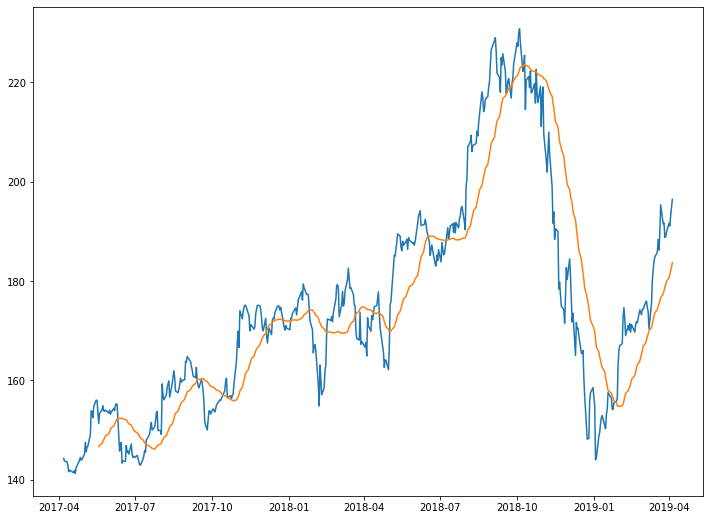

In [14]:
plt.figure(figsize=(12,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [15]:
df.diff().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,-0.559997,-0.340011,-0.179993,-0.320008,-0.310287,-4476800.0
2017-04-10,-0.129990,-0.299988,-0.370010,-0.169998,-0.164856,2261200.0
2017-04-11,-0.660004,-0.529999,-2.839996,-1.539993,-1.493256,11446000.0
2017-04-12,-1.339996,-1.200012,0.949997,0.169998,0.164826,-10029400.0


## `.pct_change()` 

In [16]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,-0.003881,-0.002353,-0.001255,-0.002228,-0.002227,-0.211679
2017-04-10,-0.000904,-0.002081,-0.002583,-0.001186,-0.001186,0.135627
2017-04-11,-0.004596,-0.003684,-0.019874,-0.010756,-0.010756,0.604540
2017-04-12,-0.009375,-0.008371,0.006783,0.001200,0.001200,-0.330138


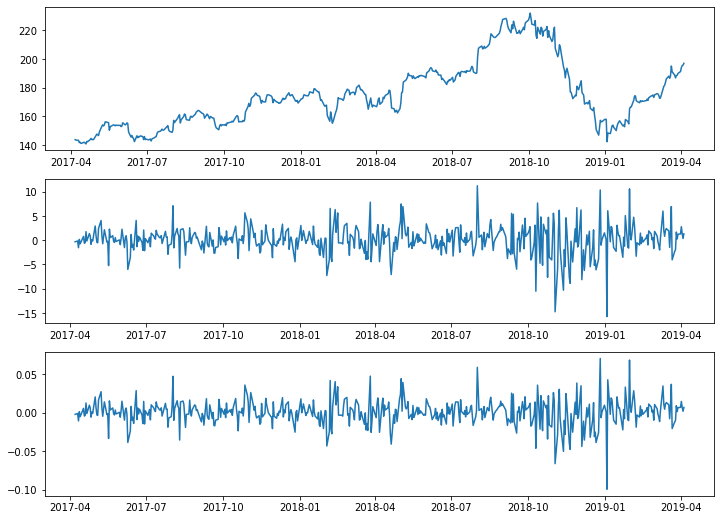

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))
axes[0].plot(df.Close)
axes[1].plot(df.Close.diff())
axes[2].plot(df.Close.pct_change())

## Volatility

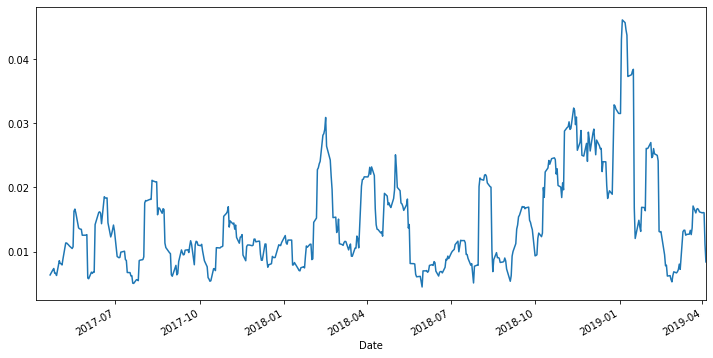

In [18]:
plt.figure(figsize=(12,6))
df.Close.pct_change().rolling(10).std().plot()

## Shifting

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


In [20]:
df.shift().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,144.289993,144.520004,143.449997,143.660004,139.301605,21149000.0
2017-04-10,143.729996,144.179993,143.270004,143.339996,138.991318,16672200.0
2017-04-11,143.600006,143.880005,142.899994,143.169998,138.826462,18933400.0
2017-04-12,142.940002,143.350006,140.059998,141.630005,137.333206,30379400.0


## Creating a simple dataset

In [21]:
pd.concat([
    df[['Close']].rename(columns={'Close': 'y'}),
    df[['Close']].shift().rename(columns={'Close': 'prev_close'}),
    df[['Open']].rename(columns={'Open': 'open'})
], axis=1).head()

,y,prev_close,open
Date,,,
2017-04-06,143.660004,NaN,144.289993
2017-04-07,143.339996,143.660004,143.729996
2017-04-10,143.169998,143.339996,143.600006
2017-04-11,141.630005,143.169998,142.940002
2017-04-12,141.800003,141.630005,141.600006


##  Autocorrelation and the Autocorrelation Function (ACF)
---

In previous weeks, our analyses have been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely earlier values relate to values that occur later in time.

Examples of autocorrelation are:

    In stock market data, the stock price at one point is correlated with the stock 
    price of the point that's directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less of an extent.

Below is the formula for the autocorrelation function (ACF):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ and measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$

## Computing Autocorrelation
---

To compute autocorrelation, we fix a lag (k), which is the delta between the given point and the prior point used to compute the correlation.

With a k value of 1, we'd compute how correlated a value is with the value that's immediately prior. With a k value of 10, we'd compute how correlated a variable is with the value that's 10 time points prior.

## Autocorrelation Using Statsmodels
---

Statsmodels comes with some convenient packages for calculating and plotting autocorrelation. Import the following function and try it out:

```python
from statsmodels.graphics.tsaplots import plot_acf
```

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

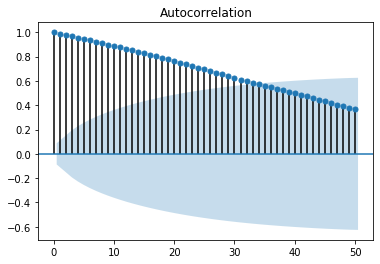

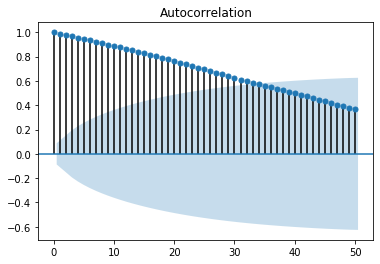

In [23]:
plot_acf(df.Close, lags=50)

In [24]:
np.corrcoef(df.Close[1:], df.Close.shift()[1:])

array([[1.        , 0.99158422],
       [0.99158422, 1.        ]])

## Partial Autocorrelation and the Partial Autocorrelation Function (PACF)
---

Another important chart for diagnosing your time series is the partial autocorrelation chart (PACF). This is similar to autocorrelation, but, instead of being just the correlation at increasing lags, it is the correlation at a given lag, _controlling for the effect of previous lags._

Load up the sister function for partial autocorrelation from Statsmodels and test it out on the `close_price`.

```python
from statsmodels.graphics.tsaplots import plot_pacf
```

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

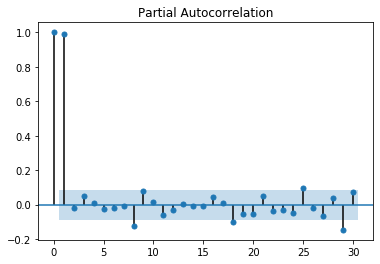

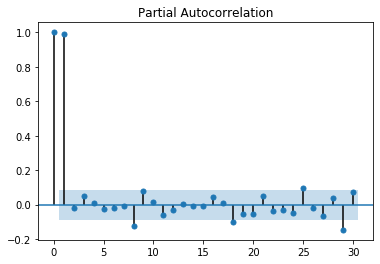

In [26]:
plot_pacf(df.Close, lags=30)